<a href="https://colab.research.google.com/github/venancioigor/ML_MVP_PUC_dataset/blob/master/MVP_PUC_ML_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introdução

O dataset escolhido representa uma narrativa onde uma princesa foi amaldiçoada e para ser libertada de sua maldição é necessário que um alquemista consiga descobrir e utilizar a exata quantidade de cada ingrediente da poção, porque caso contrário a princesa poderá morrer e o alquemista perderá sua vida.

Para tão importante missão, o alquemista irá utilizar um modelo de machine learning que o ajudará a classificar se a quantidade que ele precisa de cada ingriente vai curar ou matar a princesa.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/venancioigor/ML_MVP_PUC_dataset/master/fairyTaleDataSet.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Pena de Fenix,Chifre de Unicornio,Sangue de Dragão,Lágrimas de Sereia,Pó de Fada,Dedos de Duende,Poção da Bruxa,Garra de Grifo,Cabelo de Troll,Tinta de Kraken,Chifre de Minotauro,Escama de Basilisco,Presa de Quimera,Curado
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.922460 (0.012017)
CART: 0.844920 (0.029290)
NB: 0.787701 (0.022055)
SVM: 0.955615 (0.017419)


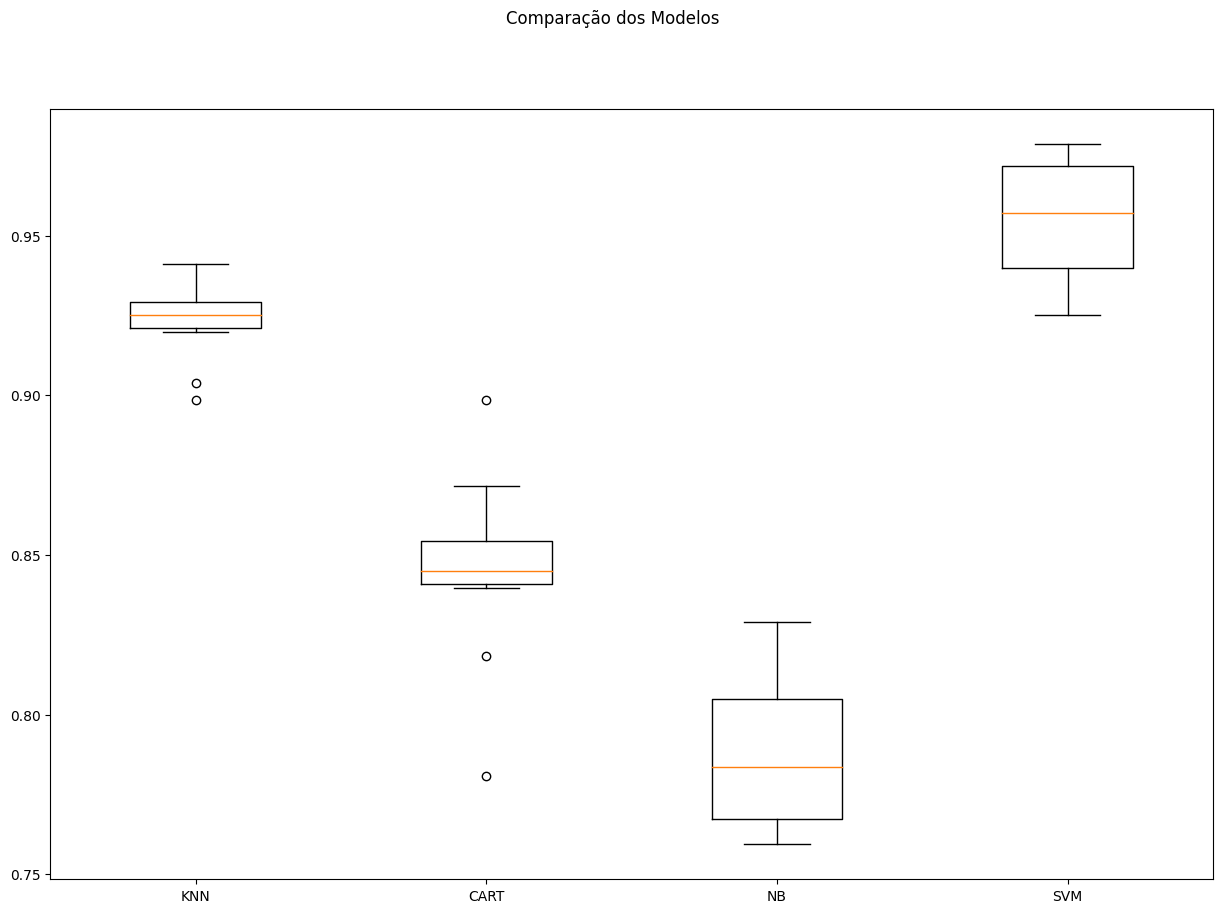

In [4]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

> Bloco com recuo



KNN-orig: 0.922 (0.012)
CART-orig: 0.845 (0.029)
NB-orig: 0.788 (0.022)
SVM-orig: 0.956 (0.017)
KNN-padr: 0.913 (0.012)
CART-padr: 0.851 (0.026)
NB-padr: 0.788 (0.022)
SVM-padr: 0.953 (0.017)
KNN-norm: 0.912 (0.012)
CART-norm: 0.848 (0.021)
NB-norm: 0.788 (0.022)
SVM-norm: 0.953 (0.018)


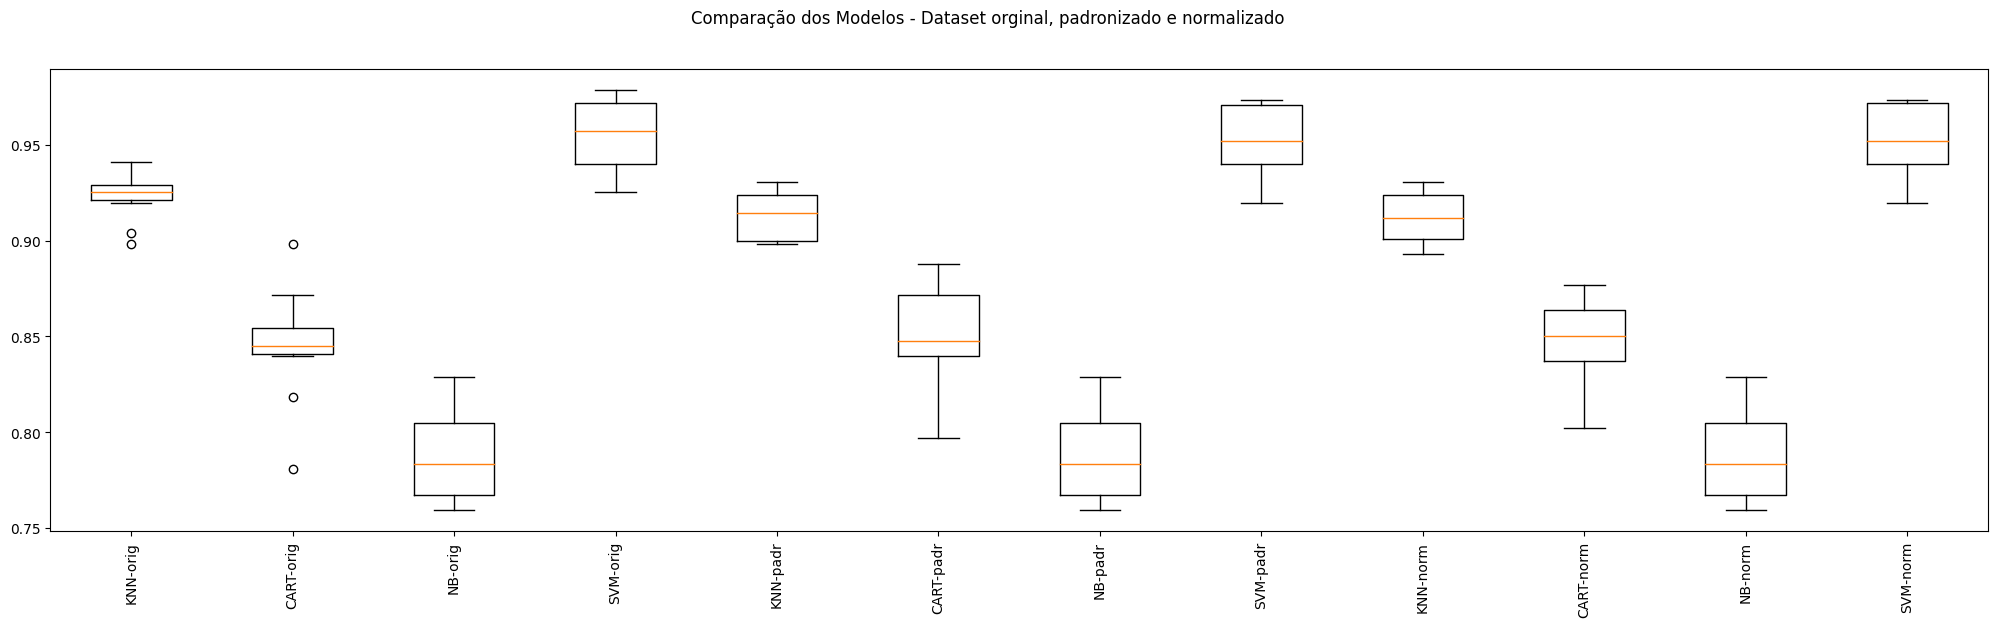

In [5]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [6]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.931016 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-padr - Melhor: 0.928877 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.926738 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}


## Finalização do Modelo

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9316239316239316


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

## Simulando a aplicação do modelo em dados não vistos

In [8]:
# Novos dados - não sabemos a classe
data = {
    'Pena de Fenix': [22.1],
    'Chifre de Unicornio': [10.8],
    'Sangue de Dragão': [16.4],
    'Lágrimas de Sereia': [10.5],
    'Pó de Fada': [22.0],
    'Dedos de Duende': [23.4],
    'Poção da Bruxa': [2.6],
    'Garra de Grifo': [18.2],
    'Cabelo de Troll': [23.8],
    'Tinta de Kraken': [11.3],
    'Chifre de Minotauro': [5.5],
    'Escama de Basilisco': [16.8],
    'Presa de Quimera': [16.2]
}
atributos = [
              'Pena de Fenix', 'Chifre de Unicornio', 'Sangue de Dragão','Lágrimas de Sereia',
              'Pó de Fada','Dedos de Duende','Poção da Bruxa', 'Poção da Bruxa', 'Garra de Grifo',
              'Cabelo de Troll',  'Tinta de Kraken','Chifre de Minotauro','Escama de Basilisco',
              'Presa de Quimera'
             ]

entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.78000146 -0.03596506  0.04410393 -0.40704247  0.83384669  1.16963386
  -1.28092914 -1.52288129  0.15033376  1.13213457  0.06210127 -1.14000161
   0.60833554]]


In [9]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print("A previsão para a nova poção é:", "Curada" if saidas[0] == 1 else "Não Curada")


A previsão para a nova poção é: Não Curada


### Conclusão

Após análise do dataset foi possível notar que o modelo SVM produziu melhores resultados, porém o modelo KNN também é uma opção a ser escolhida dada uma acurácia maior que 90%.

Por fim, fizemos a validação de dados que o modelo não conhecia, demonstrando que o modelo treinado pode ser usado na prática para fazer previsões sobre novos dados.

Agora o alquemista está mais confiante para produzir a solução mágica que vai liberar a princesa das garrafas da bruxa.
